# Matplotlib

A Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Resources:
* Offical tutorial: <https://matplotlib.org/tutorials/index.html>
    * Especially the [Pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
    * You should make the best of the [API manual](https://matplotlib.org/api/) which is very detailed
    * Also, matplotlib has a [gallery](https://matplotlib.org/gallery.html) with lots of sample plots you can have a look and learn the codes
* Tutorial in Chinese: <https://liam.page/2014/09/11/matplotlib-tutorial-zh-cn/>
    * It uses another interface `pylab`, which exists some differences with standard `matplotlib.pyplot`
    * But as announced in matplotlib official website, "pylab is deprecated and its use is strongly discouraged because of namespace pollution. Use pyplot instead."

    
Firstly import the packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Parts of a Figure

The figure below shows the basic elements in matplotlib.
![anatomy](https://matplotlib.org/_images/anatomy.png)

Then we can follow the anatomies and create our first figure.


## Simple Plot

We create a numpy array and draw the figure of linear, quadratic, cubic functions.

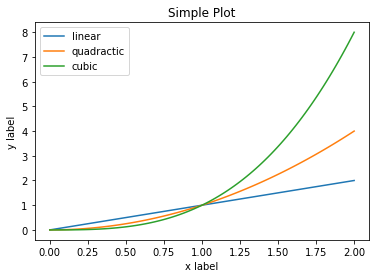

In [2]:
# create x array (matplotlib also supports Python array)
x = np.linspace(0, 2, 100)

# create y array
y_linear = x
y_quad = x ** 2
y_cubic = x ** 3

# directly plot by plt
plt.plot(x, y_linear, label="linear") # labels will be shown in legend
plt.plot(x, y_quad, label="quadractic")
plt.plot(x, y_cubic, label="cubic")

# add x,y axis labels
plt.xlabel("x label")
plt.ylabel("y label")

# add title
plt.title("Simple Plot")

# show legends
plt.legend()

# show the final figure
plt.show()

You can find the arguments of `plt.plot` from the [API manual](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).
Some commonly used arguments are
* label
* marker: '.', ',', 'o', 'v', '^', '+', 'x'
* linestyle: '-', '--', '-.', ':'
* alpha
    * abbr: 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
    * full name: 'green'
    * hex strings: '#008000'
* color

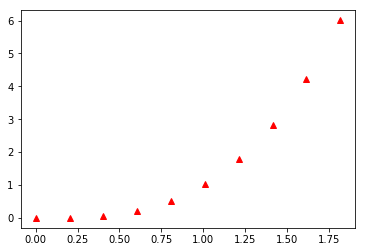

In [3]:
plt.plot(x[::10], y_cubic[::10], "^", color="r")
plt.show()

## Plot with keyword strings

There are some instances where you have data in a format that lets you access particular variables with strings. For example, with [`numpy.recarray`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.recarray.html#numpy.recarray) or [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame).

Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

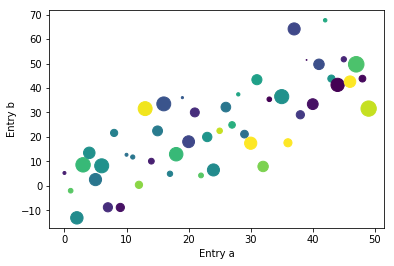

In [4]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data) # c: color, s: size
plt.xlabel('Entry a')
plt.ylabel('Entry b')
plt.show()

## Plot with categorical variables

It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

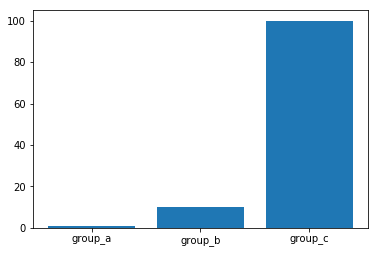

In [5]:
names = ['group_a', 'group_b', 'group_c']
x_pos = [1, 2, 3]
values = [1, 10, 100]

plt.bar(x_pos, values, tick_label=names)
plt.show()

## Multiple figures and axes

Matplotlib uses a matrix-like notation to indicate which subfigure you are plotting. You can use the [`subplot(nrows, ncols, index, **kwargs)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot) function to generate several figures.
For example:

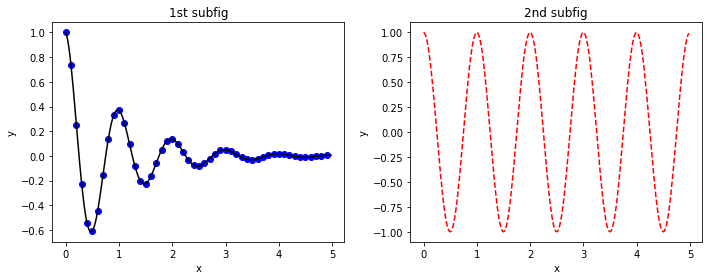

In [6]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

# generate a canvas
plt.figure(figsize=(10,4))

# the first figure
plt.subplot(121)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("1st subfig")

# the second figure
plt.subplot(122)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.xlabel("x")
plt.ylabel("y")
plt.title("2nd subfig")

# show the results
plt.tight_layout()
plt.show()

Or you can use `pyplot.subplots` to creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. But the name of the member functions may be different. For example, you need to call `set_xlabel` instead of `xlabel` in subfig mode.

See the tutorial of [subplots](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html) and you can find how to share the axes, titles, etc.

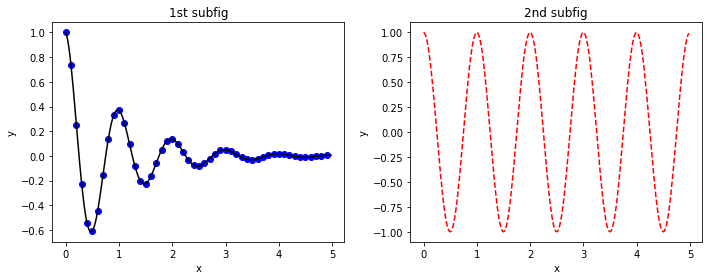

In [7]:
# generate a canvas
fig, axs = plt.subplots(1,2,figsize=(10,4))

# the first figure
axs[0].plot(t1, f(t1), 'bo', t2, f(t2), 'k')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_title("1st subfig")

# the second figure
axs[1].plot(t2, np.cos(2*np.pi*t2), 'r--')
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_title("2nd subfig")

# show the results
plt.tight_layout()
plt.show()

## Grouped bar chart with labels

To draw bars size by size, you need to calculate the x coordinate yourself.
Firstly calculate the coordinates of the ticks and then minus/plus width to obtain the coordinates of the bars.

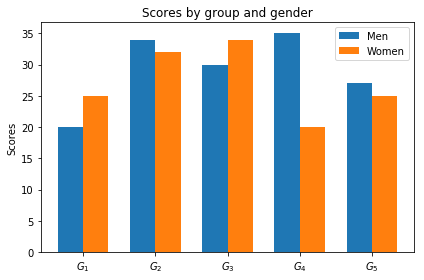

In [8]:
# Notice you can use LaTeX command in the text of matplotlib
labels = ['$G_1$', '$G_2$', '$G_3$', '$G_4$', '$G_5$'] # TeX command!

men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

## Colors

Colors are important in figures. Commonly, you need not change the colors even if you have multiple curves or bars. But if you have special needs, please use the colors in predefined [color map](https://matplotlib.org/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py).

Read [Colors in Scientific Figures](https://www.aje.com/dist/docs/Using_Color_In_Your_Manuscript_Figures.pdf) and pay attention to that.

## Storage

Finally, you need to output your figure. In research papers, the images should be with high resolution, so please save them in vectogram, i.e. `.eps` or `.pdf` format. Notice the `plt.savefig` function should be called before the `plt.show` function.

Let's copy the code above and have a try.

In [9]:
labels = ['$G_1$', '$G_2$', '$G_3$', '$G_4$', '$G_5$'] # TeX command!

men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.savefig("test.pdf",format="pdf",dpi=200)